<a href="https://colab.research.google.com/github/AlexandrChipizubov/Data_analysis_chit_sheets/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pygmo
# !pip install numpy scipy pyade-python

# import pygmo as pg
# import pyade.shade
# import keras as k
# from bokeh.plotting import figure, output_file, show
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from numpy import savetxt
# from numpy import loadtxt
# from scipy.stats import wilcoxon
# from sklearn import preprocessing
# from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')
way = '/content/drive/My Drive/House Prices/'

Mounted at /content/drive


In [ ]:
house_data = pd.read_csv(way + "input/house-prices-advanced-regression-techniques/train.csv")

удалить величину из ячеек таблицы (100$)

In [ ]:
house_data.LotArea = house_data.LotArea.apply(lambda x: str(x)+'$')
print(house_data['LotArea'])

0        8450$
1        9600$
2       11250$
3        9550$
4       14260$
         ...  
1455     7917$
1456    13175$
1457     9042$
1458     9717$
1459     9937$
Name: LotArea, Length: 1460, dtype: object


In [ ]:
house_data['LotArea($)'] = house_data['LotArea'].apply(lambda x: x.replace('$', '')).astype(int)
print(house_data['LotArea($)'])

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea($), Length: 1460, dtype: int64


изменить формат отображения даты (с правильным форматированием непонятных значений или пропусков)

In [ ]:
print(house_data['GarageYrBlt'].isnull().sum())
print(house_data['GarageYrBlt'].count())

house_data['GarageYrBlt_formatted'] = pd.to_datetime(house_data['GarageYrBlt'], format='%Y', errors = 'coerce')
print(house_data['GarageYrBlt_formatted'][38:])

81
1379
38     1953-01-01
39            NaT
40     1965-01-01
41     1959-01-01
42     1983-01-01
          ...    
1455   1999-01-01
1456   1978-01-01
1457   1941-01-01
1458   1950-01-01
1459   1965-01-01
Name: GarageYrBlt_formatted, Length: 1422, dtype: datetime64[ns]


кодировки категориальных признаков 

In [ ]:
print(house_data['GarageType'].unique())
print(house_data['GarageType'].isnull().sum())
dct = {'Attchd': 0, 'Detchd': 1, 'BuiltIn': 2, 'CarPort': 3, 'Basment': 4, '2Types': 5}
house_data['GarageType_coded'] = house_data['GarageType'].map(dct).astype('Int64')
print(house_data['GarageType_coded'])
print(house_data['GarageType'].isnull().sum())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
81
0       0
1       0
2       0
3       1
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: GarageType_coded, Length: 1460, dtype: Int64
81


In [ ]:
house_data['GarageType_coded'] = house_data['GarageType'].factorize()[0]
print(house_data['GarageType_coded'])
print(house_data['GarageType_coded'].unique())
print(house_data['GarageType_coded'].isnull().sum())
# Если использовать такой способ, nan принимают значение -1

0       0
1       0
2       0
3       1
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: GarageType_coded, Length: 1460, dtype: int64
[ 0  1  2  3 -1  4  5]
0


разбиение одного столбца на несколько

In [ ]:
house_data['combined_column'] = house_data['LotFrontage'].astype(str) + '/' + house_data['LotArea'].astype(str)
print(house_data['combined_column'])

tmp = house_data['combined_column'].str.split('/')
house_data['LotFrontage_splited'], house_data['LotArea_splited'] = tmp.apply(lambda x: x[0]).astype(float), tmp.apply(lambda x: x[1]).astype(int)
print(house_data['LotFrontage_splited'][6:], house_data['LotArea_splited'])

0        65.0/8450
1        80.0/9600
2       68.0/11250
3        60.0/9550
4       84.0/14260
           ...    
1455     62.0/7917
1456    85.0/13175
1457     66.0/9042
1458     68.0/9717
1459     75.0/9937
Name: combined_column, Length: 1460, dtype: object
6       75.0
7        NaN
8       51.0
9       50.0
10      70.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage_splited, Length: 1454, dtype: float64 0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea_splited, Length: 1460, dtype: int64


In [ ]:
house_data['combined_column'] = house_data['LotFrontage'].astype(str) + '/' + house_data['LotArea'].astype(str)
house_data[['LotFrontage_splited', 'LotArea_splited']] = pd.DataFrame(house_data['combined_column'].str.split('/').to_list(), columns = ['1', '2'])
print(house_data['LotFrontage_splited'][6:], house_data['LotArea_splited'])

6       75.0
7        nan
8       51.0
9       50.0
10      70.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage_splited, Length: 1454, dtype: object 0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea_splited, Length: 1460, dtype: object


In [ ]:
house_data['combined_column'] = house_data['LotFrontage'].astype(str) + '/' + house_data['LotArea'].astype(str)
house_data[['LotFrontage_splited', 'LotArea_splited']] = house_data['combined_column'].str.split('/', expand = True)
print(house_data['LotFrontage_splited'][6:], house_data['LotArea_splited'])

6       75.0
7        nan
8       51.0
9       50.0
10      70.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage_splited, Length: 1454, dtype: object 0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea_splited, Length: 1460, dtype: object


In [ ]:
# способ, если нет nan-ов и прочих ошибок в данныых:
house_data['combined_column'] = house_data['MSSubClass'].astype(str) + '/' + house_data['LotArea'].astype(str)
st = '/'.join(house_data['combined_column'])
house_data[['MSSubClass_splited', 'LotArea_splited']] = pd.DataFrame(np.array(st.split('/')).reshape(-1, 2))
print(house_data['MSSubClass_splited'][6:], house_data['LotArea_splited'])

6        20
7        60
8        50
9       190
10       20
       ... 
1455     60
1456     20
1457     70
1458     20
1459     20
Name: MSSubClass_splited, Length: 1454, dtype: object 0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea_splited, Length: 1460, dtype: object


количество объектов с каждым значени признака

In [ ]:
print(house_data['GarageType'].value_counts())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


ПРОПУСКИ:

удаление объектов или признаков с пропусками

In [ ]:
print(house_data.head(3))
print(house_data.dropna(how='any',axis=1).head(3))
print(house_data.dropna(how='any',axis=0))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]
   Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2        

заменяем на какое-либо значение

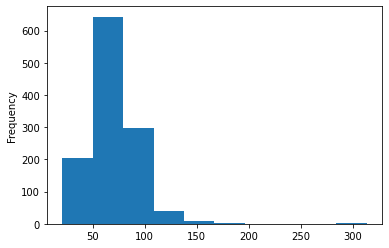

In [ ]:
house_data['LotFrontage'].plot.hist()

AxesSubplot(0.125,0.125;0.775x0.755)


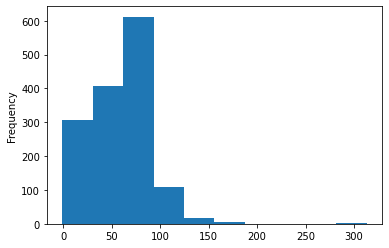

In [ ]:
house_data['LotFrontage'].fillna(-1).plot.hist()

замена на легковычислимое значение